In [1]:
# %pip install pandas
# %pip install scikit-learn
# %pip install plotly
# %pip install numpy
# %pip install matplotlib
# %pip install nbformat

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import plotly.express as px


In [3]:
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral",
}

print(emotion_labels)

{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


In [4]:
fer2013_df = pd.read_csv("../../data/raw/fer2013/fer2013.csv", index_col=False)
fer2013_df.drop(columns="Usage", inplace=True)

for index, row in fer2013_df.iterrows():
    expression = emotion_labels.get(row["emotion"]).lower()
    fer2013_df.loc[index, "emotion"] = expression

fer2013_df.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_31548\1638444225.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'angry' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fer2013_df.loc[index, "emotion"] = expression


,emotion,pixels
0,angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,angry,151 150 147 155 148 133 111 140 170 174 182 15...
2,fear,231 212 156 164 174 138 161 173 182 200 106 38...
3,sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


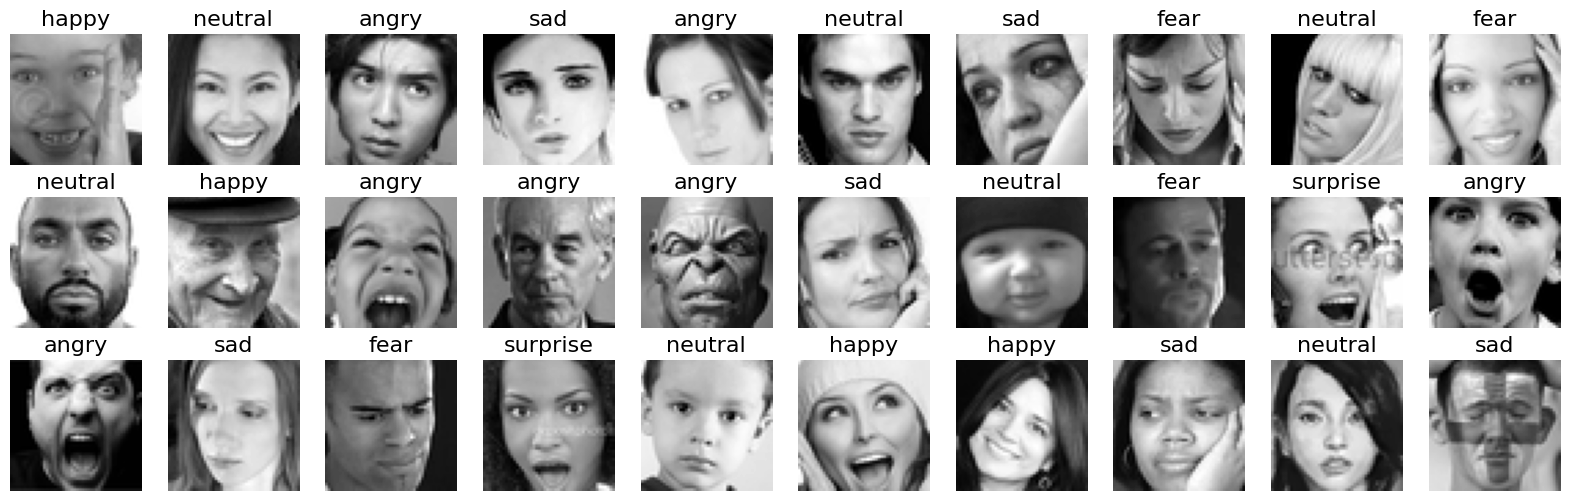

In [8]:
sample_df = fer2013_df.sample(n=30, random_state=42)

fig, ax = plt.subplots(3, 10, figsize=(20, 6))
counter = 0
for index, row_df in sample_df.iterrows():
    image_string = row_df["pixels"].split(" ")
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48, 48)
    img = Image.fromarray(image_data)
    row, col = divmod(counter, 10)
    ax[row, col].imshow(img, cmap="gray")
    ax[row, col].axis("off")
    ax[row, col].set_title(row_df["emotion"], fontsize=16)
    counter = counter + 1

plt.show()

In [6]:
fer2013_df["emotion"].value_counts()

emotion
happy       8989
neutral     6198
sad         6077
fear        5121
angry       4953
surprise    4002
disgust      547
Name: count, dtype: int64

In [7]:
fig = px.bar(fer2013_df["emotion"].value_counts(), color=fer2013_df["emotion"].value_counts().index)

fig.update_layout(
    title="Total images for each label in dataset",
    xaxis_title="Emotion",
    yaxis_title="Count",
    height=600,
    width=800,
    font_size=16
)

fig.update_traces(texttemplate="%{y}", textposition="inside")

fig.show()